In [1]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np
import pandas as pd
import scipy.stats
from scipy.interpolate import make_smoothing_spline

In [11]:
path = '../tmp'
ticker = '8035'
date = '2024-06-07'
pkl = '%s/%s_%s.pkl' % (path, ticker, date)
df = pd.read_pickle(pkl)
df

,Price
2024-06-07 09:00:04,34560.0
2024-06-07 09:00:09,34690.0
2024-06-07 09:00:16,34670.0
2024-06-07 09:00:22,34600.0
2024-06-07 09:00:28,34570.0
...,...
2024-06-07 14:59:38,34410.0
2024-06-07 14:59:44,34420.0
2024-06-07 14:59:50,34420.0
2024-06-07 14:59:56,34420.0


In [12]:
date_str = str(df.index[0].date())
t_start_1 = pd.to_datetime(date_str + ' 09:00:00')
t_start_2 = pd.to_datetime(date_str + ' 10:00:00')
t_mid = pd.to_datetime(date_str + ' 12:00:00')
print(type(t_mid))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [13]:
df1 = df.loc[df.index[df.index < t_mid]]
df2 = df.loc[df.index[df.index > t_mid]]

In [14]:
df11 = df1.copy()
df11.index = [(t - t_start_1).total_seconds() for t in df1.index]
df11

,Price
4.0,34560.0
9.0,34690.0
16.0,34670.0
22.0,34600.0
28.0,34570.0
...,...
8971.0,34440.0
8986.0,34430.0
8989.0,34440.0
8994.0,34440.0


In [15]:
df21 = df2.copy()
df21.index = [(t - t_start_2).total_seconds() for t in df2.index]
df21

,Price
9003.0,34510.0
9010.0,34500.0
9013.0,34500.0
9019.0,34520.0
9022.0,34510.0
...,...
17978.0,34410.0
17984.0,34420.0
17990.0,34420.0
17996.0,34420.0


In [16]:
df0 = pd.concat([df11, df21])
df0

,Price
4.0,34560.0
9.0,34690.0
16.0,34670.0
22.0,34600.0
28.0,34570.0
...,...
17978.0,34410.0
17984.0,34420.0
17990.0,34420.0
17996.0,34420.0


In [17]:
x = df0.index
y = scipy.stats.zscore(df0['Price'])

t_start_0 = 0
t_end_0 = 18000
t_interval_0 = 30

spl = make_smoothing_spline(x, y)
xs = np.linspace(t_start_0, t_end_0, int((t_end_0 - t_start_0) / t_interval_0))
type(spl(xs))

numpy.ndarray

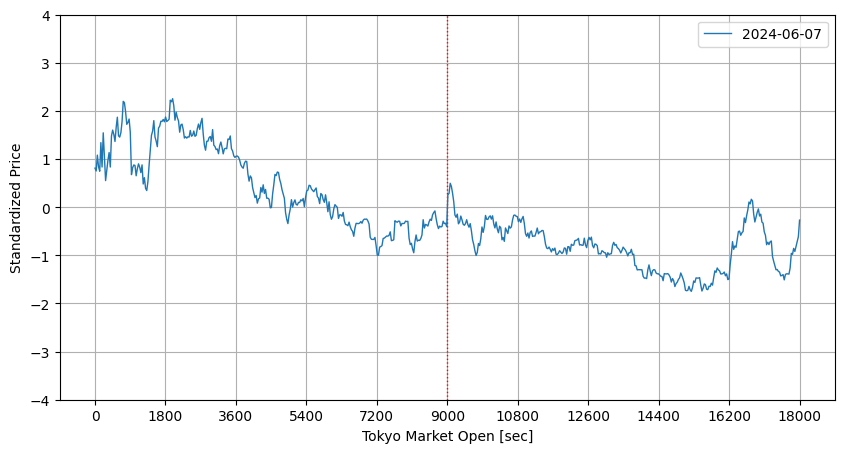

In [18]:
plt.rcParams["figure.figsize"] = (10, 5)
fig, ax = plt.subplots()

ax.axvline(x=9000, linestyle='dotted', lw=1, c='red')

ax.set_xlabel('Tokyo Market Open [sec]')
ax.set_ylabel('Standardized Price')

ax.xaxis.set_ticks(np.arange(0, 18001, 1800))
ax.set_ylim(-4, 4)

#ax.scatter(x, y, s=1, c='gray')
ax.plot(xs, spl(xs), lw=1, label=date)
ax.grid()
ax.legend(loc='best')

plt.show()